In [53]:
def upper_triangular_solve(A, b):
    """
    Solve the system  A x = b  where A is assumed to be lower triangular,
    i.e. A(i,j) = 0 for j > i, and the diagonal is assumed to be nonzero,
    i.e. A(i,i) != 0.
    
    The code checks that A is lower triangular and converts A and b to
    double precision before computing.

    ARGUMENTS:  A   lower triangular n x n array
                b   right hand side column n-vector

    RETURNS:    x   column n-vector solution
    """

    # we should take care to ensure that arrays are stored with the correct type - float!
    A = A.astype(np.float64)
    b = b.astype(np.float64)
      
    # check sizes of A and b match appropriately
    nb=len(b)
    n, m = A.shape
    if n != m:
        raise ValueError(f'A is not a square matrix! {A.shape}')
    if n != nb:
        raise ValueError(f'shapes of A and b do not match! {A.shape} {b.shape}')
    
    # check A is upper triangular
    for i in range(n):
        for j in range(0,i):
            if not np.isclose(A[i, j], 0.0):
                raise ValueError(f'A is not upper triangular! {A[i, j]}')

    # checks whether A has zero diagonal element
    for i in range(n):
        if np.isclose(A[i, i], 0.0):
            raise ValueError(f'A[{i}, {i}] is zero')
    
    #create a new array to store the results
    x = np.empty_like(b)
    
    # perform backwards substitution
    x[n-1] = b[n-1] / A[n-1, n-1]
    for i in range(2,n+1):
        x[n-i] = b[n-i] / A[n-i, n-i]
        for j in range(n-i+1, n):
            x[n-i] = x[n-i] - A[n-i,j]*x[j] / A[n-i, n-i]
        
    return x

def Gaussian_elimination_pivoting(A, b, verbose=False):
    # To ensure that arrays are stored in double precision.
    A = A.astype(np.float64)
    b = b.astype(np.float64)
     
    # size of solution vector / the square matrix A
    n=len(b) # or   n, n = A.shape
        
    # check sizes of A and b match appropriately
    nb=len(b)
    n, m = A.shape
    if n != m:
        raise ValueError(f'A is not a square matrix! {A.shape}')
    if n != nb:
        raise ValueError(f'shapes of A and b do not match! {A.shape} {b.shape}')
    
    if verbose:
        print('starting system\n', A, b)
  
    # perform forward elimination
    for i in range(n):          
        # find the index of the maximal value in column i on or below
        # the diagonal of A
        maximum = abs(A[i,i])
        max_index = i
        for j in range(i+1,n):
            if abs(A[j,i]) > maximum :
                maximum = abs(A[j,i])               
                max_index = j   
                                       
        
        # swap two max_indexs: i and max_index[i]
        temp = b[i]
        b[i] = b[max_index]
        b[max_index] = temp
        for j in range(n):
            temp = A[i,j]
            A[i,j] = A[max_index,j]
            A[max_index,j] = temp  
            
        
        # check diagonal
        if np.isclose(A[i, i], 0.0):
            raise ValueError(f'A has zero on diagonal! A[{i}, {i}] = 0') 

        # row j <- row j - (a_{ji} / a_{ii}) row i
        for j in range(i+1, n):
            if verbose:
                print(f'row {j} <- row {j} - {A[j, i] / A[i, i]} row {i}')
            factor = A[j, i] / A[i, i]
            for k in range(0, n):
                A[j, k] = A[j, k] - factor * A[i, k]
            b[j] = b[j] - factor * b[i]
        
    return upper_triangular_solve(A, b)

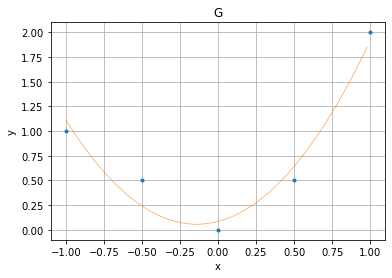

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Put points here
x = np.array([-1, -0.5,0, 0.5, 1])
y = np.array([1,0.5,0, 0.5, 2])

fig = plt.figure(1)
plt.plot(x, y, linewidth=0.0, marker ='.')
plt.title("G")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()


#Now: put it into a matrix format

A = np.array([[1,-1,1],[0.25,-0.5,1],[0,0,1], [0.25,0.5,1], [1,1,1]]) 
A = np.array([[-1,1],[-0.5,1], [0,1], [0.5, 1],[1,1]]) #linear
b = y # equals to y

# r = b - Ax #minimise this
# Ax = b
# A^t*Ax = A^t*b

At = A.transpose()

AtA = np.matmul(At, A)
Atb = np.matmul(At, b)

#Solve this using gaucian or something

equation = Gaussian_elimination_pivoting(AtA, Atb)

#print the x values for those x in equation


n = int(100)
x0 = np.double(-1.0)
xEnd = np.double(x[x.size-1])
xt = np.double(xEnd-x0) / n
equationOutput = np.zeros(n)

xAxis = []
for i in range(n):
    #equationOutput[i]+= equation[0]*np.power(x0,2)+equation[1]*x0+equation[2] # quadratic
    equationOutput[i] += equation[0]*x0+equation[1] #linear
    xAxis.append(x0)
    x0+= xt

plt.plot(xAxis, equationOutput, linewidth=0.5)
plt.show()

# For specific value
x = 0
x = equation[0]*np.power(x,2)+equation[1]*x+equation[2]
#print(x)
